In [1]:
! ls ./data/eval/Y14/Y14_2123_superficial_B-2

test_attributions.pkl  test_results.csv        train_performances.csv
test_fitness.csv       test_results.pkl        train_performances.pkl
test_fitness.pkl       train_attributions.pkl  train_results.csv
test_performances.csv  train_fitness.csv       train_results.pkl
test_performances.pkl  train_fitness.pkl


In [2]:
import pandas as pd
from glob import glob
from pathlib import Path
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import matplotlib.font_manager as font_manager

fonts = sorted([f.name for f in font_manager.fontManager.ttflist])
for font in fonts:
    print(font)

Akaash
AkrutiMal1
AkrutiMal1
AkrutiMal2
AkrutiMal2
AkrutiTml1
AkrutiTml1
AkrutiTml2
AkrutiTml2
C059
C059
C059
C059
Cantarell
D050000L
DejaVu Math TeX Gyre
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans Display
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif Display
Droid Arabic Kufi
Droid Arabic Kufi
Droid Arabic Naskh
Droid Arabic Naskh
Droid Naskh Shift Alt
Droid Sans
Droid Sans
Droid Sans Arabic
Droid Sans Armenian
Droid Sans Devanagari
Droid Sans Ethiopic
Droid Sans Ethiopic
Droid Sans Fallback
Droid Sans Fallback
Droid Sans Fallback
Droid Sans Georgian
Droid Sans Hebrew
Droid Sans Hebrew
Droid Sans Japanese
Dr

In [4]:
font_name = "Liberation Sans"  # ここに選択したフォント名を入れます
plt.rcParams['font.family'] = font_name
plt.rcParams['font.size'] = 12

In [5]:
file_path = Path("./data/eval/Y14/")

In [6]:
sv_file_list = sorted(glob(str(file_path / "*vising*")))
sf_file_list = []

In [7]:
for eval_file in sv_file_list:
    sf_file_list.append(eval_file.replace("vising", "ficial"))

In [8]:
term_list = [sv_file[-3] for sv_file in sv_file_list]

In [9]:
## ここからクラスタリングの性能の話

In [10]:
cluster_dir = Path("./data/train")

In [11]:
score_list = "2 2 2 2 2 3 3 2 2 2 3 3 3 4 4 4 3 3 2".split()
size_list = "4 4 4 3 3 4 6 7 8 3 5 4 3 7 3 6 6 4 3".split()

In [12]:
def loader(expr_list):
    df_list = []
    for expr, term, score, _size in zip(expr_list, term_list, score_list, size_list):
        c_file_name = "{}_{}_{}.gzip.pkl".format(term, score, _size)
        c_file_path = cluster_dir / expr / "cluster" / c_file_name
        df_list.append(pd.read_pickle(c_file_path, compression="gzip"))
    return df_list

In [13]:
sv_cluster = loader([x.split("/")[-1] for x in sv_file_list])
sf_cluster = loader([x.split("/")[-1] for x in sf_file_list])

In [14]:
sf_len = np.array([len(x) for x in sf_cluster])

In [15]:
sf_filter = sf_len > 100

In [16]:
sv_file_list = list(np.array(sv_file_list)[sf_filter])
sf_file_list = list(np.array(sf_file_list)[sf_filter])
term_list = list(np.array(term_list)[sf_filter])
score_list = list(np.array(score_list)[sf_filter])
size_list = list(np.array(size_list)[sf_filter])

In [17]:
sv_cluster = loader([x.split("/")[-1] for x in sv_file_list])
sf_cluster = loader([x.split("/")[-1] for x in sf_file_list])

In [18]:
sv_chosen =  [x["Chosen"].sum() for x in sv_cluster]
sf_chosen =  [x["Chosen"].sum() for x in sf_cluster]

In [19]:
def transform(file_str):
    return file_str[14:23] + file_str[-3:]

In [20]:
q_list = [transform(x) for x in sv_file_list]
m_list = ["Original Model" for i in range(len(q_list))] + ["Retrained Model" for i in range(len(q_list))]

In [21]:
chosen_df = pd.DataFrame({"SF_Size": sf_chosen + sv_chosen, "Question": q_list + q_list, "Model": m_list})

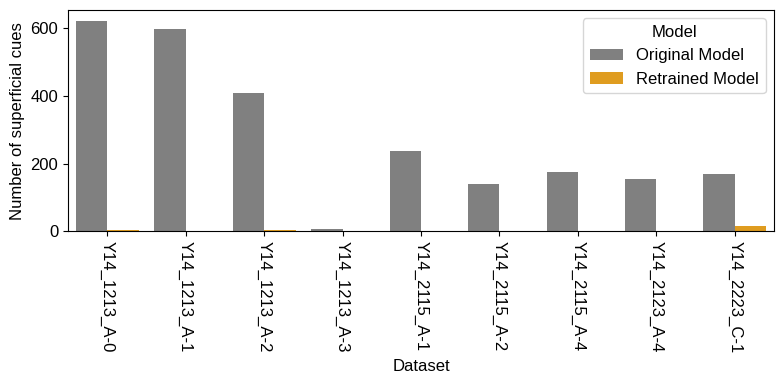

In [22]:
plt.figure(figsize=(8, 4))
barplot = sns.barplot(data=chosen_df, x="Question", y="SF_Size", hue="Model", palette=["grey", "orange"])
#plt.legend(title="Model", bbox_to_anchor=(1.01, 1), loc=2)
plt.xticks(rotation=270)
plt.xlabel("Dataset")
plt.ylabel("Number of superficial cues")
plt.tight_layout()
plt.savefig("data/eval_sc.png")

In [23]:
#QWKの計算

In [24]:
_type = "test"

In [25]:
file_name = "{}_performances.csv".format(_type)

In [26]:
sv_performances = [pd.read_csv(Path(sv_file) / file_name) for sv_file in sv_file_list]
sf_performances = [pd.read_csv(Path(sf_file) / file_name)  for sf_file in sf_file_list]

In [27]:
sv_qwk = [float(sv_p[sv_p["item"] == term_list[idx]]["QWK"]) for idx, sv_p in enumerate(sv_performances)]

In [28]:
sf_qwk = [float(sf_p[sf_p["item"] == term_list[idx]]["QWK"]) for idx, sf_p in enumerate(sf_performances)]

In [29]:
df = pd.DataFrame({"QWK": sf_qwk + sv_qwk, "Question": q_list + q_list, "Model": m_list})

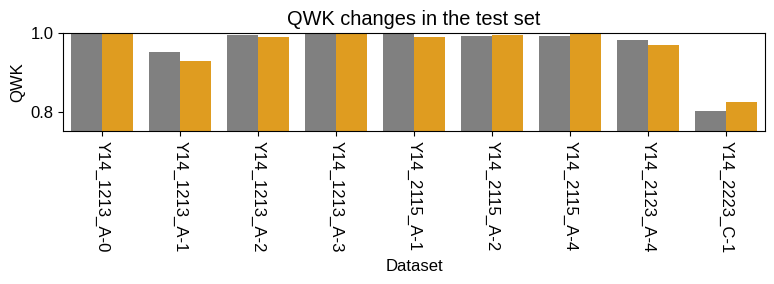

In [30]:
plt.figure(figsize=(8, 3))
barplot = sns.barplot(data=df, x="Question", y="QWK", hue="Model", palette=["grey", "orange"])
#hatches = ['+', '\\']
#for i, bar in enumerate(barplot.patches):
#    bar.set_hatch(hatches[i % len(hatches)])
#plt.legend(title="Model", bbox_to_anchor=(1.01, 1), loc=2)
l = plt.legend()
l.remove()
plt.xticks(rotation=270)
plt.ylim(0.75, 1.0)
plt.xlabel("Dataset")
plt.title("QWK changes in the {} set".format(_type))
plt.tight_layout()
plt.savefig("data/eval_qwk_{}.png".format(_type))

In [31]:
sv_file_list

['data/eval/Y14/Y14_1213_supervising_A-0',
 'data/eval/Y14/Y14_1213_supervising_A-1',
 'data/eval/Y14/Y14_1213_supervising_A-2',
 'data/eval/Y14/Y14_1213_supervising_A-3',
 'data/eval/Y14/Y14_2115_supervising_A-1',
 'data/eval/Y14/Y14_2115_supervising_A-2',
 'data/eval/Y14/Y14_2115_supervising_A-4',
 'data/eval/Y14/Y14_2123_supervising_A-4',
 'data/eval/Y14/Y14_2223_supervising_C-1']

In [32]:
sv_qwk[5]

0.996375098502758

In [33]:
sf_qwk[5]

0.9928012519561816